In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
import numpy as np
import os

# Set the path to the directory where the .npy files are located
load_path = '/content/drive/MyDrive/HW5'

# Load the images and labels from the .npy files
train_images = np.load(os.path.join(load_path, 'train_images.npy'))
val_images = np.load(os.path.join(load_path, 'val_images.npy'))
test_images = np.load(os.path.join(load_path, 'test_images.npy'))
train_labels = np.load(os.path.join(load_path, 'train_labels.npy'))
val_labels = np.load(os.path.join(load_path, 'val_labels.npy'))
test_labels = np.load(os.path.join(load_path, 'test_labels.npy'))

# Example usage: Printing the shape of the loaded arrays
print("Train Images Shape:", train_images.shape)
print("Val Images Shape:", val_images.shape)
print("Test Images Shape:", test_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Val Labels Shape:", val_labels.shape)
print("Test Labels Shape:", test_labels.shape)


Train Images Shape: (35288, 30, 30, 3)
Val Images Shape: (3921, 30, 30, 3)
Test Images Shape: (12630, 30, 30, 3)
Train Labels Shape: (35288,)
Val Labels Shape: (3921,)
Test Labels Shape: (12630,)


In [13]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the MLP model
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(30, 30, 3)),
    layers.Dense(40, activation='relu'),
    layers.Dense(40, activation='relu'),
    layers.Dense(40, activation='relu'),
    layers.Dense(43, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Define early stopping criteria
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001)

# Train the model with early stopping
history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=100, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


Epoch 1/100
1103/1103 [==============================] - 8s 5ms/step - loss: 3.4339 - accuracy: 0.1302 - val_loss: 3.0707 - val_accuracy: 0.2663
Epoch 2/100
1103/1103 [==============================] - 7s 6ms/step - loss: 2.7792 - accuracy: 0.3640 - val_loss: 2.5393 - val_accuracy: 0.4195
Epoch 3/100
1103/1103 [==============================] - 8s 7ms/step - loss: 2.3346 - accuracy: 0.4588 - val_loss: 2.1749 - val_accuracy: 0.4767
Epoch 4/100
1103/1103 [==============================] - 7s 6ms/step - loss: 2.0240 - accuracy: 0.5106 - val_loss: 1.9123 - val_accuracy: 0.5236
Epoch 5/100
1103/1103 [==============================] - 8s 7ms/step - loss: 1.7888 - accuracy: 0.5534 - val_loss: 1.7267 - val_accuracy: 0.5557
Epoch 6/100
1103/1103 [==============================] - 10s 9ms/step - loss: 1.6106 - accuracy: 0.5927 - val_loss: 1.5563 - val_accuracy: 0.6021
Epoch 7/100
1103/1103 [==============================] - 7s 7ms/step - loss: 1.4663 - accuracy: 0.6236 - val_loss: 1.4322 - val_a

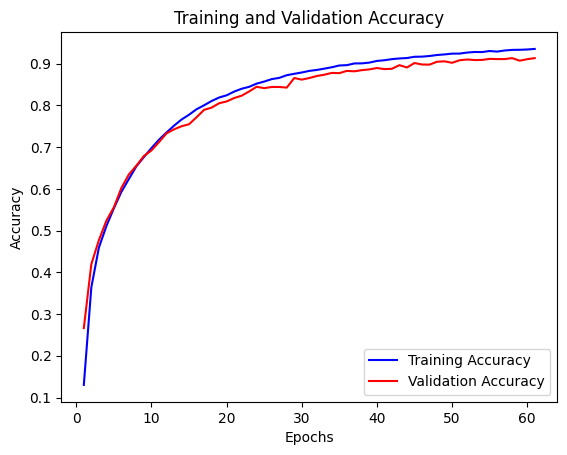

In [14]:
import matplotlib.pyplot as plt
# Get the accuracy history from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Plot the accuracy history
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

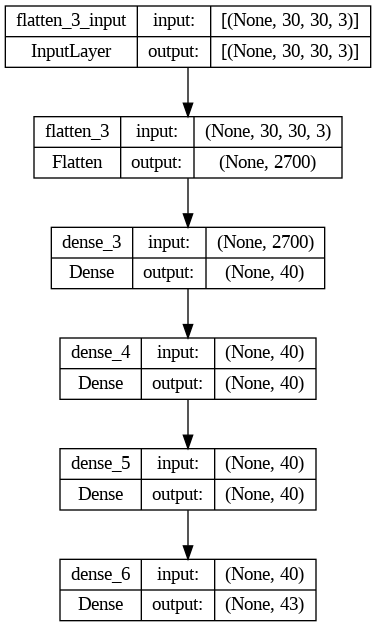

In [16]:
from tensorflow.keras.utils import plot_model
# Plot the model
plot_model(model, show_shapes=True, show_layer_names=True)

123/123 [==============================] - 0s 2ms/step


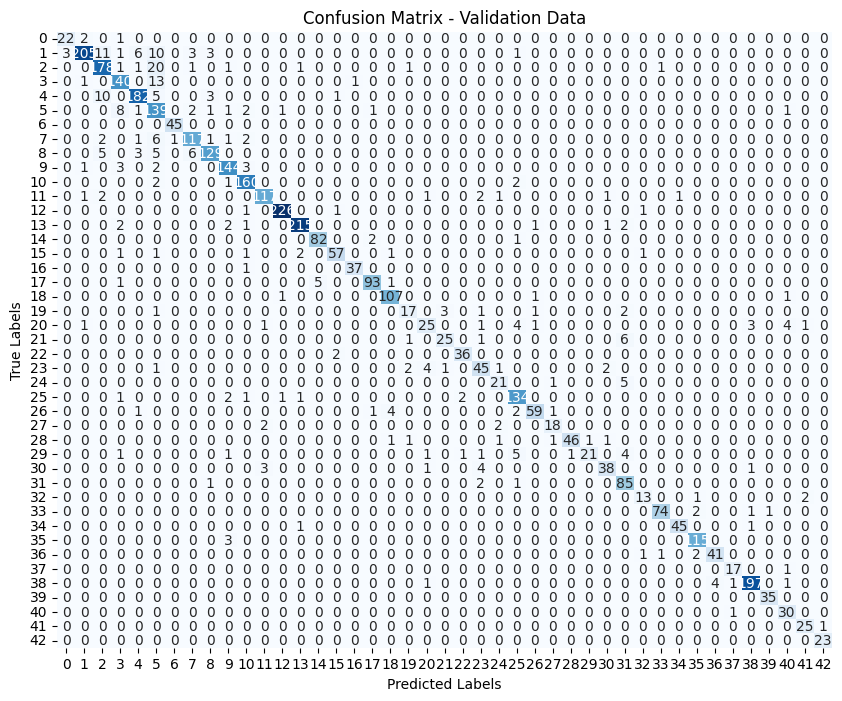

395/395 [==============================] - 1s 2ms/step


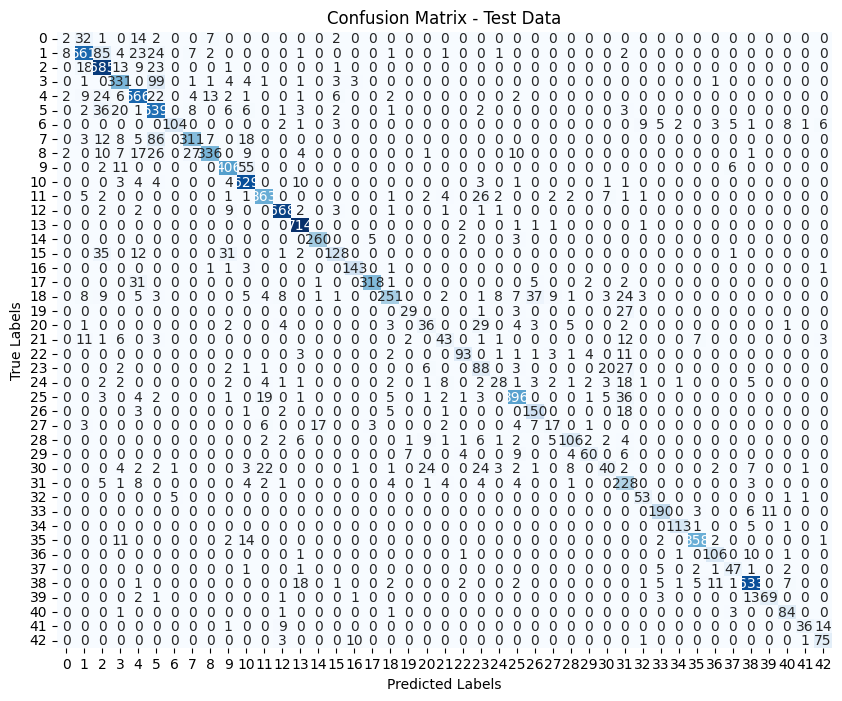

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the validation data
val_pred = model.predict(val_images)
val_pred_labels = np.argmax(val_pred, axis=1)

# Get the true labels for the validation data
val_true_labels = val_labels

# Compute the confusion matrix for validation data
val_cm = confusion_matrix(val_true_labels, val_pred_labels)

# Plot the confusion matrix for validation data
plt.figure(figsize=(10, 8))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Get the predicted labels for the test data
test_pred = model.predict(test_images)
test_pred_labels = np.argmax(test_pred, axis=1)

# Get the true labels for the test data
test_true_labels = test_labels

# Compute the confusion matrix for test data
test_cm = confusion_matrix(test_true_labels, test_pred_labels)

# Plot the confusion matrix for test data
plt.figure(figsize=(10, 8))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers

# Define the new model
model2 = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(43, activation='softmax')
])

# Plot the model
plot_model(model2, show_shapes=True, show_layer_names=True)

# Compile the model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
# Train the model
history = model2.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=64, epochs=epochs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


552/552 [==============================] - 19s 10ms/step - loss: 0.9737 - accuracy: 0.7270 - val_loss: 0.1069 - val_accuracy: 0.9735
Epoch 2/10
552/552 [==============================] - 5s 8ms/step - loss: 0.1422 - accuracy: 0.9583 - val_loss: 0.0575 - val_accuracy: 0.9857
Epoch 3/10
552/552 [==============================] - 4s 8ms/step - loss: 0.0761 - accuracy: 0.9798 - val_loss: 0.0421 - val_accuracy: 0.9893
Epoch 4/10
552/552 [==============================] - 7s 13ms/step - loss: 0.0550 - accuracy: 0.9843 - val_loss: 0.0242 - val_accuracy: 0.9923
Epoch 5/10
552/552 [==============================] - 4s 8ms/step - loss: 0.0428 - accuracy: 0.9875 - val_loss: 0.0194 - val_accuracy: 0.9946
Epoch 6/10
552/552 [==============================] - 4s 8ms/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.0170 - val_accuracy: 0.9949
Epoch 7/10
552/552 [==============================] - 5s 9ms/step - loss: 0.0261 - accuracy: 0.9920 - val_loss: 0.0146 - val_accuracy: 0.9964
Epoch 8/10
552

123/123 [==============================] - 1s 2ms/step


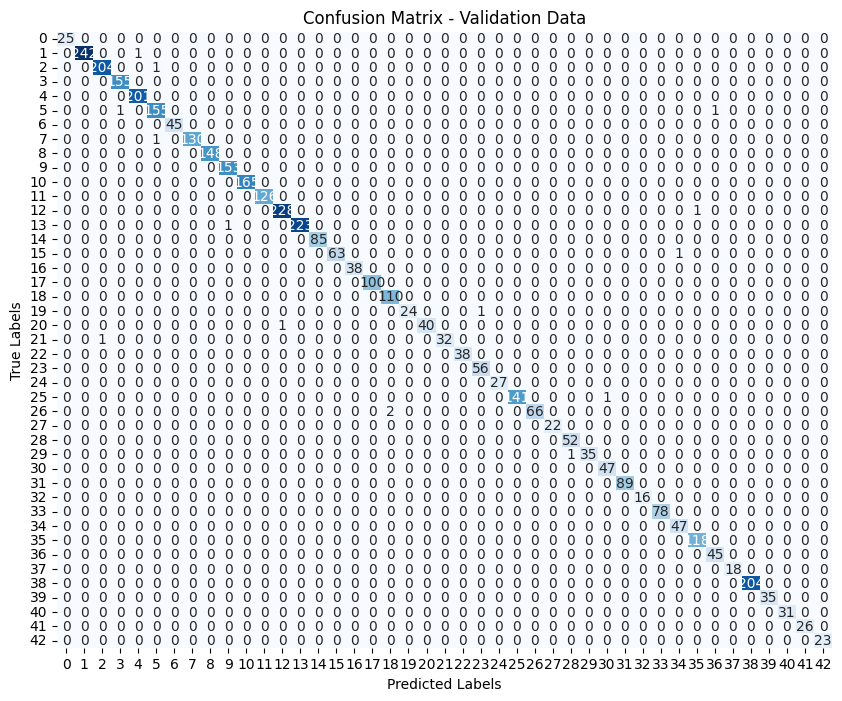

395/395 [==============================] - 1s 2ms/step


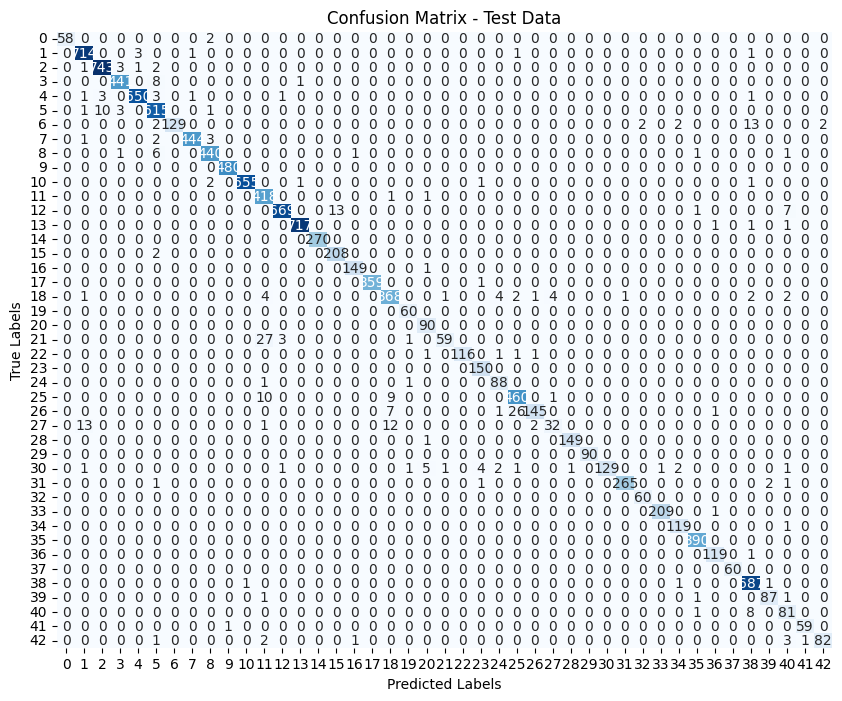

In [ ]:
# Plot the model
plot_model(model2, show_shapes=True, show_layer_names=True)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the validation data
val_pred = model2.predict(val_images)
val_pred_labels = np.argmax(val_pred, axis=1)

# Get the true labels for the validation data
val_true_labels = val_labels

# Compute the confusion matrix for validation data
val_cm = confusion_matrix(val_true_labels, val_pred_labels)

# Plot the confusion matrix for validation data
plt.figure(figsize=(10, 8))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Get the predicted labels for the test data
test_pred = model2.predict(test_images)
test_pred_labels = np.argmax(test_pred, axis=1)

# Get the true labels for the test data
test_true_labels = test_labels

# Compute the confusion matrix for test data
test_cm = confusion_matrix(test_true_labels, test_pred_labels)

# Plot the confusion matrix for test data
plt.figure(figsize=(10, 8))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


395/395 [==============================] - 1s 3ms/step - loss: 0.1466 - accuracy: 0.9749
Test Loss: 0.14658918976783752
Test Accuracy: 0.974901020526886


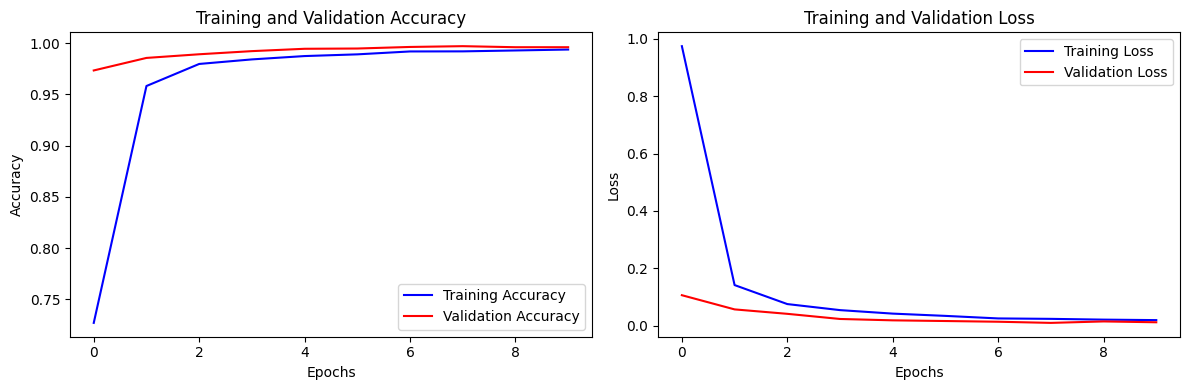

In [ ]:
import matplotlib.pyplot as plt
epochs=range(10)
# Get the accuracy and loss history from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the loss history
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


552/552 [==============================] - 12s 17ms/step - loss: 0.4354 - accuracy: 0.8863 - val_loss: 0.0817 - val_accuracy: 0.9788
Epoch 2/10
552/552 [==============================] - 11s 20ms/step - loss: 0.0614 - accuracy: 0.9849 - val_loss: 0.0578 - val_accuracy: 0.9842
Epoch 3/10
552/552 [==============================] - 8s 14ms/step - loss: 0.0314 - accuracy: 0.9908 - val_loss: 0.0564 - val_accuracy: 0.9875
Epoch 4/10
552/552 [==============================] - 8s 14ms/step - loss: 0.0261 - accuracy: 0.9926 - val_loss: 0.0547 - val_accuracy: 0.9880
Epoch 5/10
552/552 [==============================] - 8s 15ms/step - loss: 0.0192 - accuracy: 0.9942 - val_loss: 0.0656 - val_accuracy: 0.9870
Epoch 6/10
552/552 [==============================] - 8s 14ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.0388 - val_accuracy: 0.9916
Epoch 7/10
552/552 [==============================] - 8s 14ms/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.0479 - val_accuracy: 0.9921
Epoch 8/

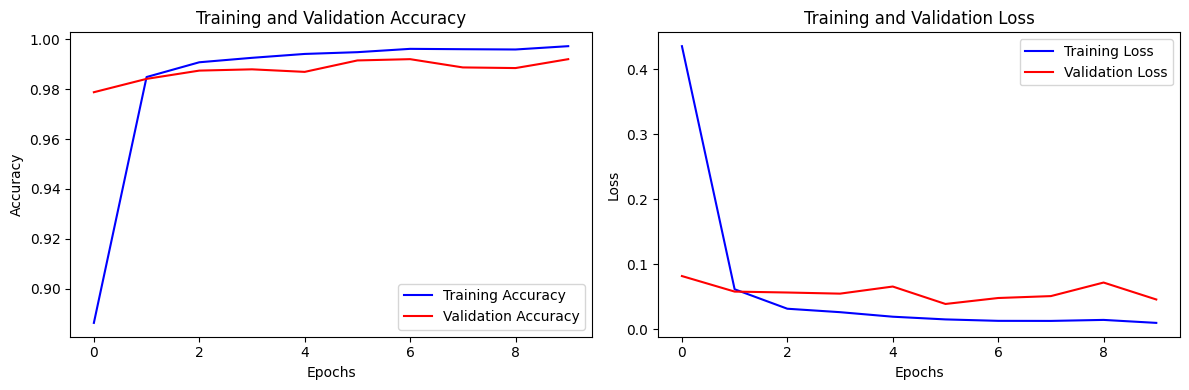

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import plot_model
# Define the new model
model2 = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(43, activation='softmax')
])


# Compile the model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model2.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=64, epochs=10)

# Plot the model
plot_model(model2, show_shapes=True, show_layer_names=True)


# Evaluate the model on test data
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

import matplotlib.pyplot as plt

# Get the accuracy and loss history from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(10)
# Plot the accuracy history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the loss history
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


123/123 [==============================] - 0s 3ms/step


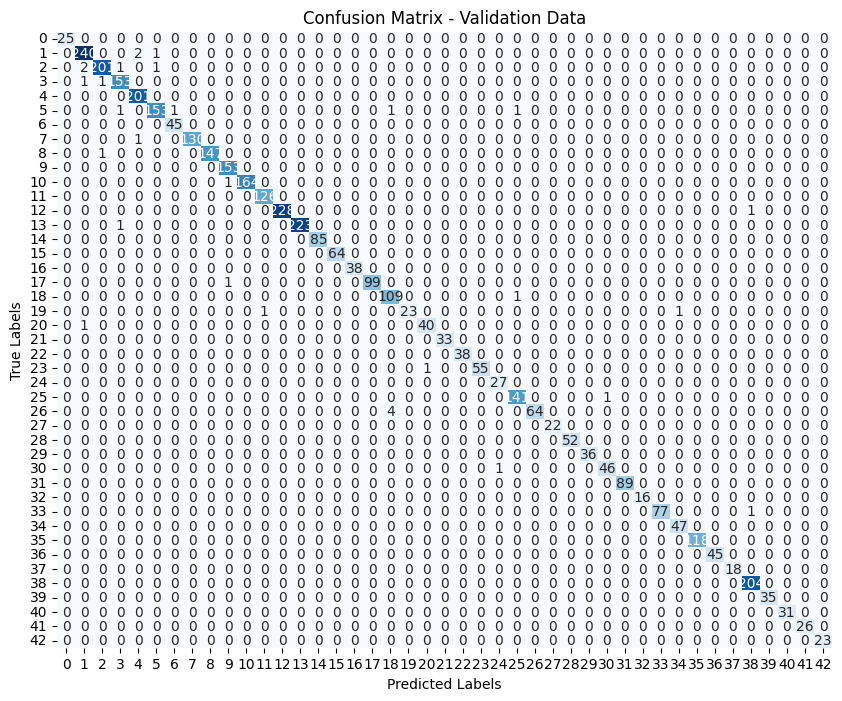

395/395 [==============================] - 1s 3ms/step


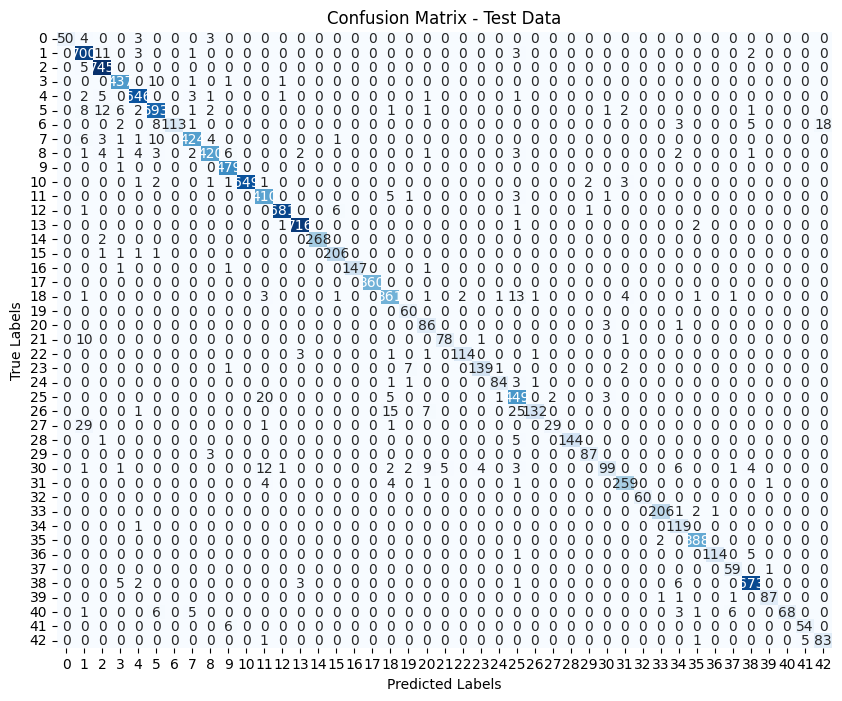

In [ ]:
plot_model(model2, show_shapes=True, show_layer_names=True)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the validation data
val_pred = model2.predict(val_images)
val_pred_labels = np.argmax(val_pred, axis=1)

# Get the true labels for the validation data
val_true_labels = val_labels

# Compute the confusion matrix for validation data
val_cm = confusion_matrix(val_true_labels, val_pred_labels)

# Plot the confusion matrix for validation data
plt.figure(figsize=(10, 8))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Get the predicted labels for the test data
test_pred = model2.predict(test_images)
test_pred_labels = np.argmax(test_pred, axis=1)

# Get the true labels for the test data
test_true_labels = test_labels

# Compute the confusion matrix for test data
test_cm = confusion_matrix(test_true_labels, test_pred_labels)

# Plot the confusion matrix for test data
plt.figure(figsize=(10, 8))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

# Define the new model
model2 = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(43, activation='softmax')
])


# Compile the model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model2.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=64, epochs=10)

model2.summary()

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


552/552 [==============================] - 8s 12ms/step - loss: 3.1768 - accuracy: 0.1232 - val_loss: 2.7656 - val_accuracy: 0.2300
Epoch 2/10
552/552 [==============================] - 6s 12ms/step - loss: 2.3968 - accuracy: 0.2930 - val_loss: 1.7510 - val_accuracy: 0.4399
Epoch 3/10
552/552 [==============================] - 6s 11ms/step - loss: 1.6933 - accuracy: 0.4551 - val_loss: 1.3403 - val_accuracy: 0.5919
Epoch 4/10
552/552 [==============================] - 6s 12ms/step - loss: 1.3397 - accuracy: 0.5640 - val_loss: 0.9354 - val_accuracy: 0.7205
Epoch 5/10
552/552 [==============================] - 6s 11ms/step - loss: 1.0433 - accuracy: 0.6663 - val_loss: 0.6759 - val_accuracy: 0.8003
Epoch 6/10
552/552 [==============================] - 6s 12ms/step - loss: 0.8233 - accuracy: 0.7428 - val_loss: 0.6138 - val_accuracy: 0.8424
Epoch 7/10
552/552 [==============================] - 6s 11ms/step - loss: 0.6630 - accuracy: 0.7947 - val_loss: 0.3454 - val_accuracy: 0.9151
Epoch 8/10

395/395 [==============================] - 1s 3ms/step - loss: 0.3761 - accuracy: 0.9070
Test Loss: 0.3760579526424408
Test Accuracy: 0.9069675207138062


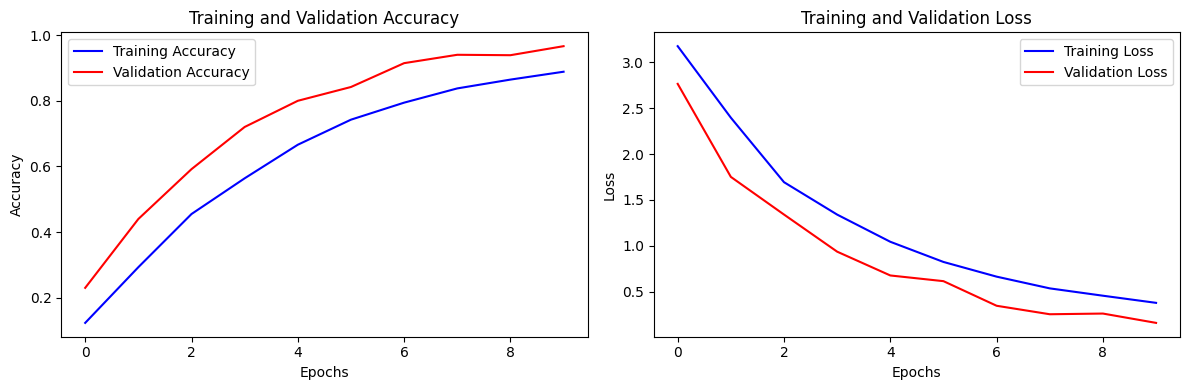

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

import matplotlib.pyplot as plt

# Get the accuracy and loss history from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
epochs=range(10)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the loss history
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10
552/552 [==============================] - 6s 8ms/step - loss: 0.8486 - accuracy: 0.7677 - val_loss: 0.1354 - val_accuracy: 0.9623
Epoch 2/10
552/552 [==============================] - 4s 7ms/step - loss: 0.0887 - accuracy: 0.9765 - val_loss: 0.0504 - val_accuracy: 0.9875
Epoch 3/10
552/552 [==============================] - 4s 7ms/step - loss: 0.0406 - accuracy: 0.9899 - val_loss: 0.0508 - val_accuracy: 0.9857
Epoch 4/10
552/552 [==============================] - 4s 7ms/step - loss: 0.0287 - accuracy: 0.9926 - val_loss: 0.0418 - val_accuracy: 0.9918
Epoch 5/10
552/552 [==============================] - 4s 8ms/step - loss: 0.0179 - accuracy: 0.9948 - val_loss: 0.0226 - val_accuracy: 0.9939
Epoch 6/10
552/552 [==============================] - 4s 7ms/step - loss: 0.0185 - accuracy: 0.9946 - val_loss: 0.0352 - val_accuracy: 0.9923
Epoch 7/10
552/552 [==============================] - 4s 7ms/step - loss: 0.0115 - accuracy: 0.9967 - val_loss: 0.0193 - val_accuracy: 0.9952
Epoch 

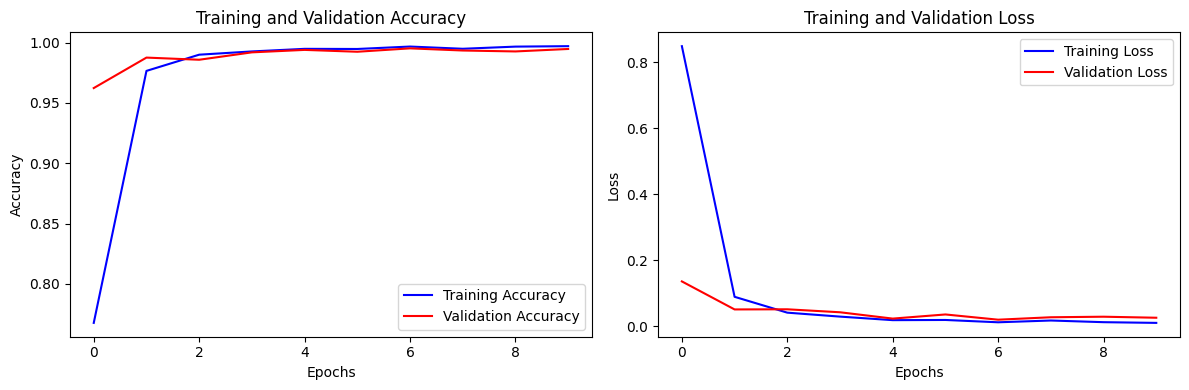

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the new model
model2 = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(43, activation='softmax')
])

# Plot the model
plot_model(model2, show_shapes=True, show_layer_names=True)

# Compile the model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model2.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=64, epochs=10)

model2.summary()


# Evaluate the model on test data
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

import matplotlib.pyplot as plt

# Get the accuracy and loss history from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the loss history
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10
552/552 [==============================] - 6s 9ms/step - loss: 3.5015 - accuracy: 0.0795 - val_loss: 3.2948 - val_accuracy: 0.1581
Epoch 2/10
552/552 [==============================] - 4s 8ms/step - loss: 2.5861 - accuracy: 0.3362 - val_loss: 1.4713 - val_accuracy: 0.5774
Epoch 3/10
552/552 [==============================] - 4s 8ms/step - loss: 1.1588 - accuracy: 0.6724 - val_loss: 0.5962 - val_accuracy: 0.8508
Epoch 4/10
552/552 [==============================] - 5s 9ms/step - loss: 0.6406 - accuracy: 0.8181 - val_loss: 0.3282 - val_accuracy: 0.9192
Epoch 5/10
552/552 [==============================] - 4s 8ms/step - loss: 0.4186 - accuracy: 0.8813 - val_loss: 0.2862 - val_accuracy: 0.9245
Epoch 6/10
552/552 [==============================] - 5s 8ms/step - loss: 0.3076 - accuracy: 0.9135 - val_loss: 0.1556 - val_accuracy: 0.9640
Epoch 7/10
552/552 [==============================] - 5s 8ms/step - loss: 0.2402 - accuracy: 0.9330 - val_loss: 0.1211 - val_accuracy: 0.9717
Epoch 

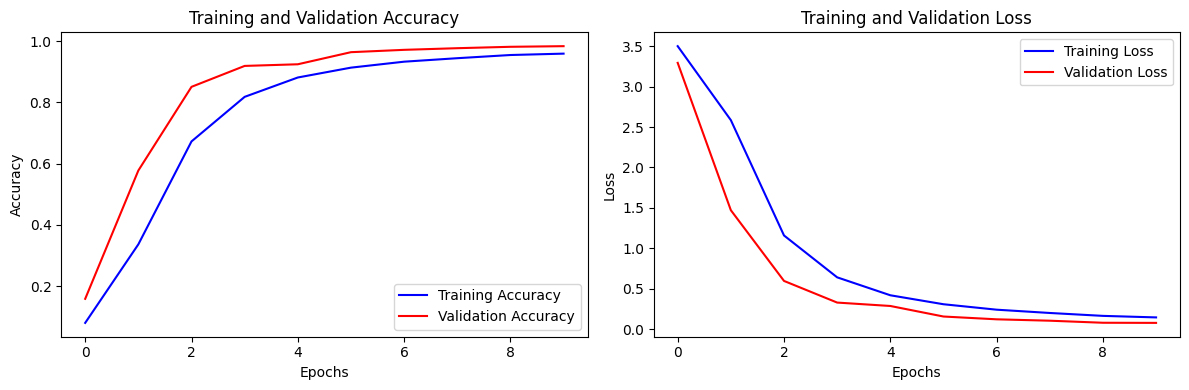

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the new model
model2 = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(43, activation='softmax')
])

# Compile the model with stochastic gradient descent optimizer
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model2.compile(optimizer=sgd_optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# Train the model
history = model2.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=64, epochs=10)

# Plot the model
plot_model(model2, show_shapes=True, show_layer_names=True)


# Evaluate the model on test data
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

import matplotlib.pyplot as plt

# Get the accuracy and loss history from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the loss history
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10
552/552 [==============================] - 7s 9ms/step - loss: 0.5830 - accuracy: 0.8373 - val_loss: 0.0719 - val_accuracy: 0.9814
Epoch 2/10
552/552 [==============================] - 5s 9ms/step - loss: 0.0729 - accuracy: 0.9795 - val_loss: 0.0351 - val_accuracy: 0.9908
Epoch 3/10
552/552 [==============================] - 5s 8ms/step - loss: 0.0419 - accuracy: 0.9879 - val_loss: 0.0227 - val_accuracy: 0.9934
Epoch 4/10
552/552 [==============================] - 5s 9ms/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0239 - val_accuracy: 0.9934
Epoch 5/10
552/552 [==============================] - 5s 9ms/step - loss: 0.0287 - accuracy: 0.9908 - val_loss: 0.0239 - val_accuracy: 0.9918
Epoch 6/10
552/552 [==============================] - 5s 8ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.0165 - val_accuracy: 0.9939
Epoch 7/10
552/552 [==============================] - 5s 9ms/step - loss: 0.0278 - accuracy: 0.9910 - val_loss: 0.0175 - val_accuracy: 0.9944
Epoch 

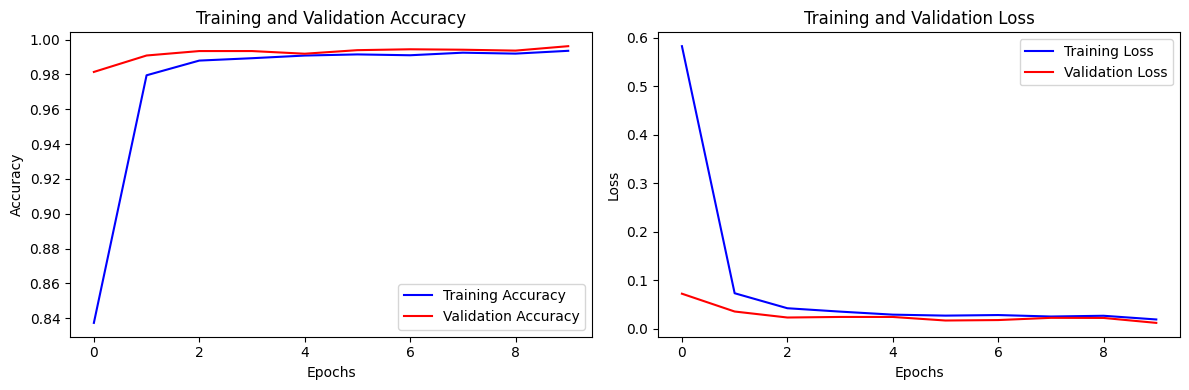

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the new model
model2 = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(30, 30, 3)),
    layers.Conv2D(64, (3, 3), activation='tanh'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='tanh'),
    layers.Conv2D(128, (3, 3), activation='tanh'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(43, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model2.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=64, epochs=10)

model2.summary()

# Evaluate the model on test data
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

import matplotlib.pyplot as plt

# Get the accuracy and loss history from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the loss history
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10
552/552 [==============================] - 7s 9ms/step - loss: 3.4712 - accuracy: 0.0678 - val_loss: 3.2905 - val_accuracy: 0.1222
Epoch 2/10
552/552 [==============================] - 5s 9ms/step - loss: 1.6597 - accuracy: 0.5403 - val_loss: 0.5315 - val_accuracy: 0.8595
Epoch 3/10
552/552 [==============================] - 5s 8ms/step - loss: 0.4259 - accuracy: 0.8767 - val_loss: 0.2046 - val_accuracy: 0.9487
Epoch 4/10
552/552 [==============================] - 5s 9ms/step - loss: 0.2272 - accuracy: 0.9363 - val_loss: 0.1183 - val_accuracy: 0.9750
Epoch 5/10
552/552 [==============================] - 5s 9ms/step - loss: 0.1457 - accuracy: 0.9606 - val_loss: 0.0815 - val_accuracy: 0.9821
Epoch 6/10
552/552 [==============================] - 5s 8ms/step - loss: 0.1098 - accuracy: 0.9691 - val_loss: 0.0642 - val_accuracy: 0.9852
Epoch 7/10
552/552 [==============================] - 5s 9ms/step - loss: 0.0855 - accuracy: 0.9766 - val_loss: 0.0502 - val_accuracy: 0.9880
Epoch 

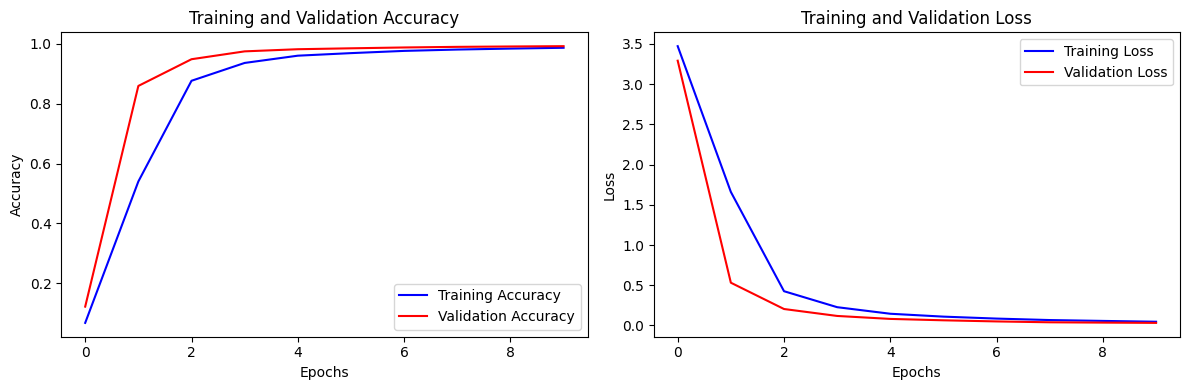

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the new model
model2 = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(30, 30, 3)),
    layers.Conv2D(64, (3, 3), activation='sigmoid'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='sigmoid'),
    layers.Conv2D(128, (3, 3), activation='sigmoid'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(43, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model2.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=64, epochs=10)

model2.summary()

# Evaluate the model on test data
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

import matplotlib.pyplot as plt

# Get the accuracy and loss history from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the loss history
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator with desired augmentation options
datagen = ImageDataGenerator(
    shear_range=0.2,  # Shearing
    zoom_range=0.05 ,   # Scaling
    rotation_range=10,  # rotation 10 degrees
    brightness_range=[0.5, 1.5],  # Adding noise (brightness)
)

# Fit the ImageDataGenerator on your training dataset (optional)
datagen.fit(train_images)

# Generate augmented images and update the train dataset
augmented_images = []
augmented_labels = []

# Iterate through the original train dataset
for image, label in zip(train_images, train_labels):
    # Reshape the image to match the expected input shape
    image = tf.expand_dims(image, axis=0)

    # Generate augmented images using the ImageDataGenerator
    augmented_iter = datagen.flow(image, batch_size=1)
    augmented_image = augmented_iter.next()[0]

    # Append the augmented image and its label to the updated train dataset
    augmented_images.append(augmented_image)
    augmented_labels.append(label)

# Convert the updated train dataset to NumPy arrays
augmented_images = tf.concat(augmented_images, axis=0)
augmented_labels = tf.convert_to_tensor(augmented_labels)
# Reshape augmented images
augmented_images = np.array(augmented_images)
augmented_images = np.reshape(augmented_images, (-1, 30, 30, 3))
# Concatenate the augmented data with the original train data
updated_train_images = tf.concat([train_images, augmented_images], axis=0)
updated_train_labels = tf.concat([train_labels, augmented_labels], axis=0)


Epoch 1/10
1103/1103 [==============================] - 11s 9ms/step - loss: 2.2154 - accuracy: 0.3966 - val_loss: 0.0833 - val_accuracy: 0.9824
Epoch 2/10
1103/1103 [==============================] - 9s 8ms/step - loss: 1.8056 - accuracy: 0.5109 - val_loss: 0.0372 - val_accuracy: 0.9929
Epoch 3/10
1103/1103 [==============================] - 9s 8ms/step - loss: 1.7796 - accuracy: 0.5175 - val_loss: 0.0246 - val_accuracy: 0.9944
Epoch 4/10
1103/1103 [==============================] - 9s 8ms/step - loss: 1.7718 - accuracy: 0.5201 - val_loss: 0.0185 - val_accuracy: 0.9957
Epoch 5/10
1103/1103 [==============================] - 10s 9ms/step - loss: 1.7638 - accuracy: 0.5218 - val_loss: 0.0178 - val_accuracy: 0.9959
Epoch 6/10
1103/1103 [==============================] - 9s 8ms/step - loss: 1.7634 - accuracy: 0.5221 - val_loss: 0.0140 - val_accuracy: 0.9964
Epoch 7/10
1103/1103 [==============================] - 9s 8ms/step - loss: 1.7589 - accuracy: 0.5233 - val_loss: 0.0163 - val_accurac

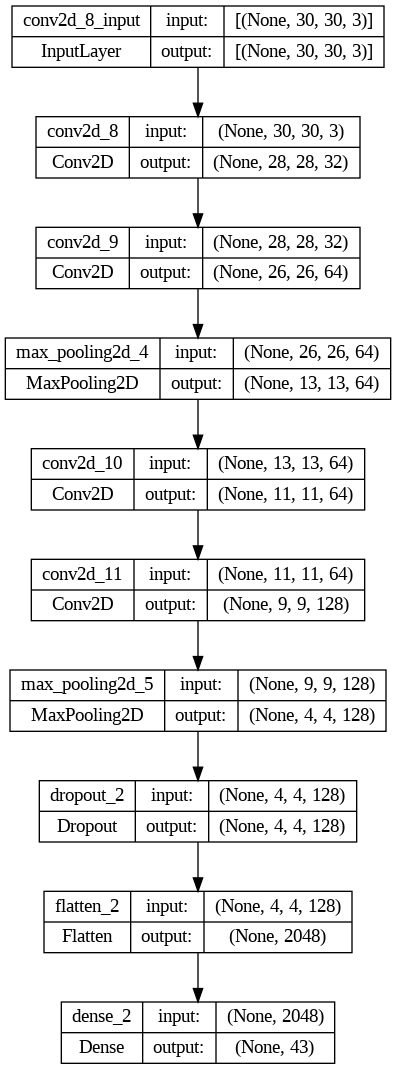

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

# Define the new model
model2 = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(43, activation='softmax')
])


# Compile the model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
# Train the model
history = model2.fit(updated_train_images, updated_train_labels, validation_data=(val_images, val_labels), batch_size=64, epochs=epochs)
# Plot the model
plot_model(model2, show_shapes=True, show_layer_names=True)


In [12]:
# Evaluate the model on test data
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


395/395 [==============================] - 2s 4ms/step - loss: 0.1280 - accuracy: 0.9778
Test Loss: 0.12802578508853912
Test Accuracy: 0.9778305888175964


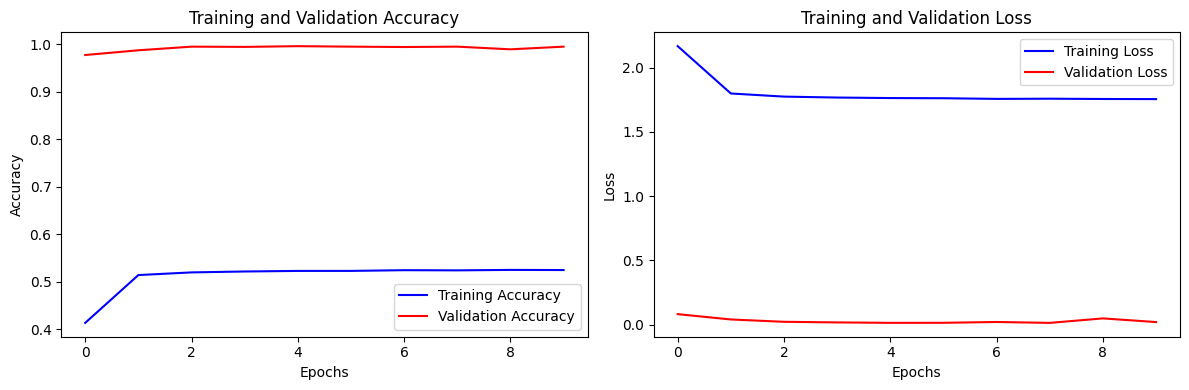

In [ ]:
import matplotlib.pyplot as plt
epochs=range(10)
# Get the accuracy and loss history from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the loss history
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


123/123 [==============================] - 0s 2ms/step


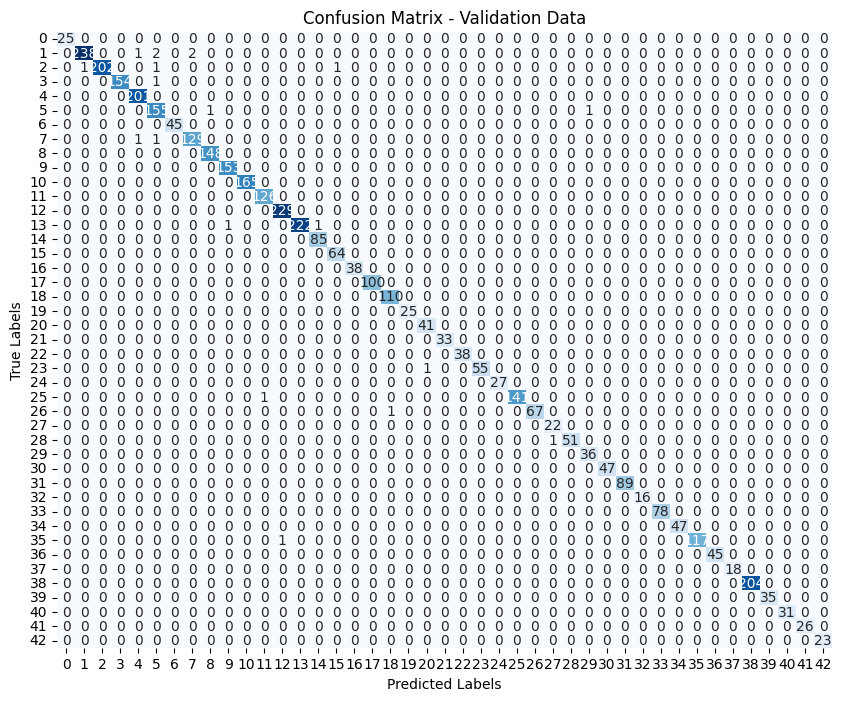

395/395 [==============================] - 1s 2ms/step


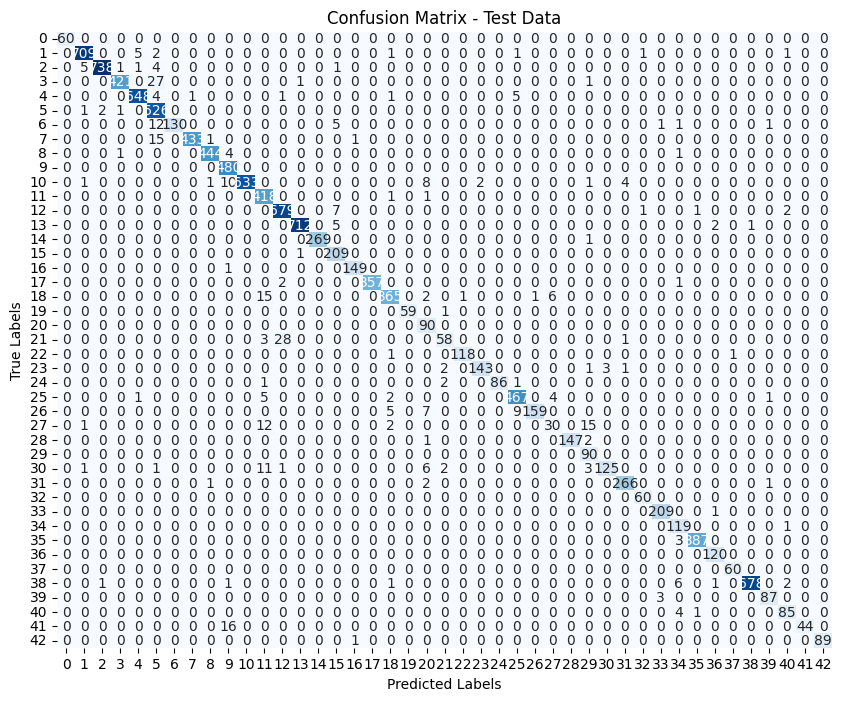

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the validation data
val_pred = model2.predict(val_images)
val_pred_labels = np.argmax(val_pred, axis=1)

# Get the true labels for the validation data
val_true_labels = val_labels

# Compute the confusion matrix for validation data
val_cm = confusion_matrix(val_true_labels, val_pred_labels)

# Plot the confusion matrix for validation data
plt.figure(figsize=(10, 8))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Get the predicted labels for the test data
test_pred = model2.predict(test_images)
test_pred_labels = np.argmax(test_pred, axis=1)

# Get the true labels for the test data
test_true_labels = test_labels

# Compute the confusion matrix for test data
test_cm = confusion_matrix(test_true_labels, test_pred_labels)

# Plot the confusion matrix for test data
plt.figure(figsize=(10, 8))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
